In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv('https://media.githubusercontent.com/media/mayurasandakalum/datasets/main/shop-customer-data/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


remove null values

In [8]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [9]:
df = df.dropna(subset=['Profession'])
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [10]:
df.shape

(1965, 8)

In [11]:
df[df['Age'] < 18].count()

CustomerID                327
Gender                    327
Age                       327
Annual Income ($)         327
Spending Score (1-100)    327
Profession                327
Work Experience           327
Family Size               327
dtype: int64

There are some inconsistant data rows that below age 18.</br>
So that, I assume that there are not correct.</br>
So that, I decided to remove them.

In [12]:
df1 = df[~(df['Age'] < 18)]
df1.shape

(1638, 8)

get column names

In [13]:
class ColumnNames:
    def __init__(self, df):
        self.all_columns = df.columns.to_list()
        self.categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
        self.numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [14]:
column_names = ColumnNames(df1)

print(column_names.all_columns)
print(column_names.categorical_columns)
print(column_names.numerical_columns)

['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['Gender', 'Profession']
['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


check are there any wrong values in the categorical variables

In [15]:
for column in column_names.numerical_columns:
    if column == "Work Experience":
        continue
    
    index = df1[column].value_counts().sort_index().index[0]
    
    if index == 0:
        print(column)
        print(f"{df1[column].value_counts().sort_index().index[0]} - {df1[column].value_counts().sort_index().values[0]}")

Annual Income ($)
0 - 2
Spending Score (1-100)
0 - 1


In [16]:
for column in column_names.numerical_columns:
    if column == "Work Experience":
        continue

    index = df1[column].value_counts().sort_index().index[0]

    if index == 0:
        df1 = df1[df1[column] != 0]

In [17]:
df1.shape

(1635, 8)

In [18]:
for column in ["Gender", "Profession"]:
    print(df1[column].value_counts())
    print("\n")

Gender
Female    973
Male      662
Name: count, dtype: int64


Profession
Artist           513
Healthcare       281
Entertainment    197
Engineer         156
Executive        126
Doctor           126
Lawyer           118
Marketing         68
Homemaker         50
Name: count, dtype: int64




outliers

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1635 non-null   int64 
 1   Gender                  1635 non-null   object
 2   Age                     1635 non-null   int64 
 3   Annual Income ($)       1635 non-null   int64 
 4   Spending Score (1-100)  1635 non-null   int64 
 5   Profession              1635 non-null   object
 6   Work Experience         1635 non-null   int64 
 7   Family Size             1635 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 115.0+ KB


In [20]:
df2 = df1.drop('CustomerID', axis=1)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1635 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1635 non-null   object
 1   Age                     1635 non-null   int64 
 2   Annual Income ($)       1635 non-null   int64 
 3   Spending Score (1-100)  1635 non-null   int64 
 4   Profession              1635 non-null   object
 5   Work Experience         1635 non-null   int64 
 6   Family Size             1635 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 102.2+ KB


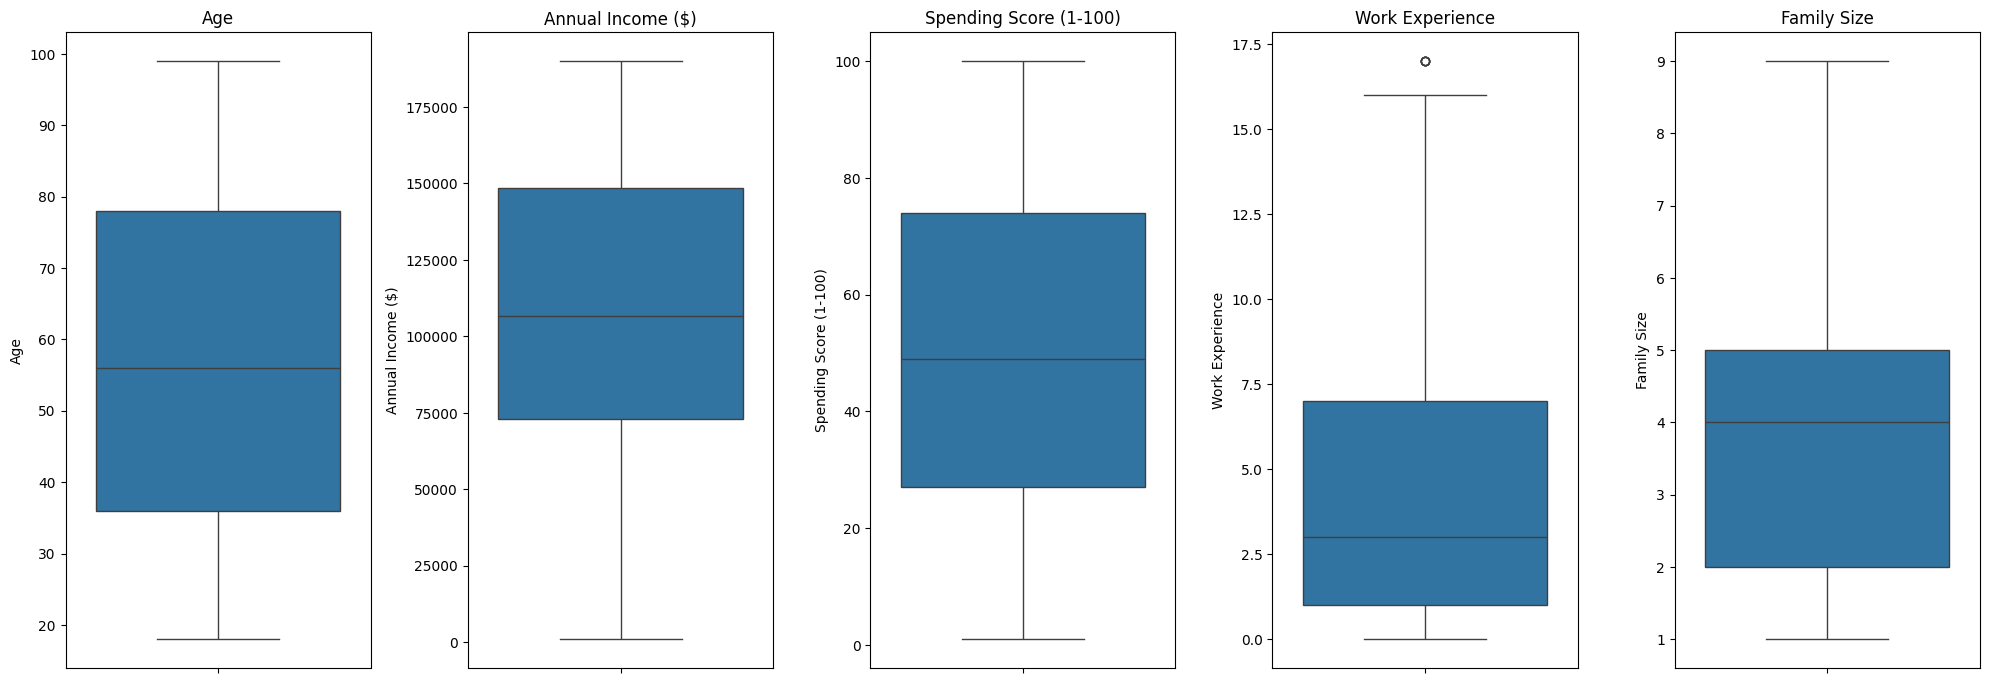

In [22]:
plt.figure(figsize=(20, 20))

# Track the current plot index
plot_index = 1

# Iterate through columns and create boxplots for each numerical column
for column in df2.columns:
    if column in column_names.categorical_columns:
        continue
    
    plt.subplot(3, 5, plot_index)
    sns.boxplot(data=df2[column])
    plt.title(column)
    plot_index += 1

plt.tight_layout()
plt.show()


In [23]:
column_names = ColumnNames(df2)

print(column_names.all_columns)
print(column_names.categorical_columns)
print(column_names.numerical_columns)

['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']
['Gender', 'Profession']
['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


In [24]:
# remove outliers
for column in column_names.numerical_columns:
    if column:
        q1 = df2[column].quantile(0.25)
        q3 = df2[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df2 = df2[(df2[column] > lower_bound) & (df2[column] < upper_bound)]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1625 non-null   object
 1   Age                     1625 non-null   int64 
 2   Annual Income ($)       1625 non-null   int64 
 3   Spending Score (1-100)  1625 non-null   int64 
 4   Profession              1625 non-null   object
 5   Work Experience         1625 non-null   int64 
 6   Family Size             1625 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 101.6+ KB


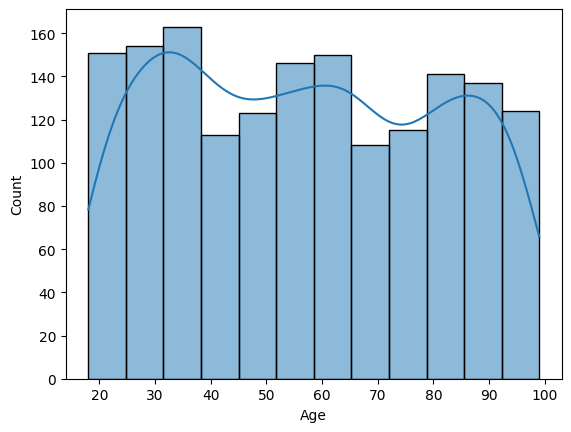

In [31]:
sns.histplot(df2["Age"], kde=True)
plt.show()

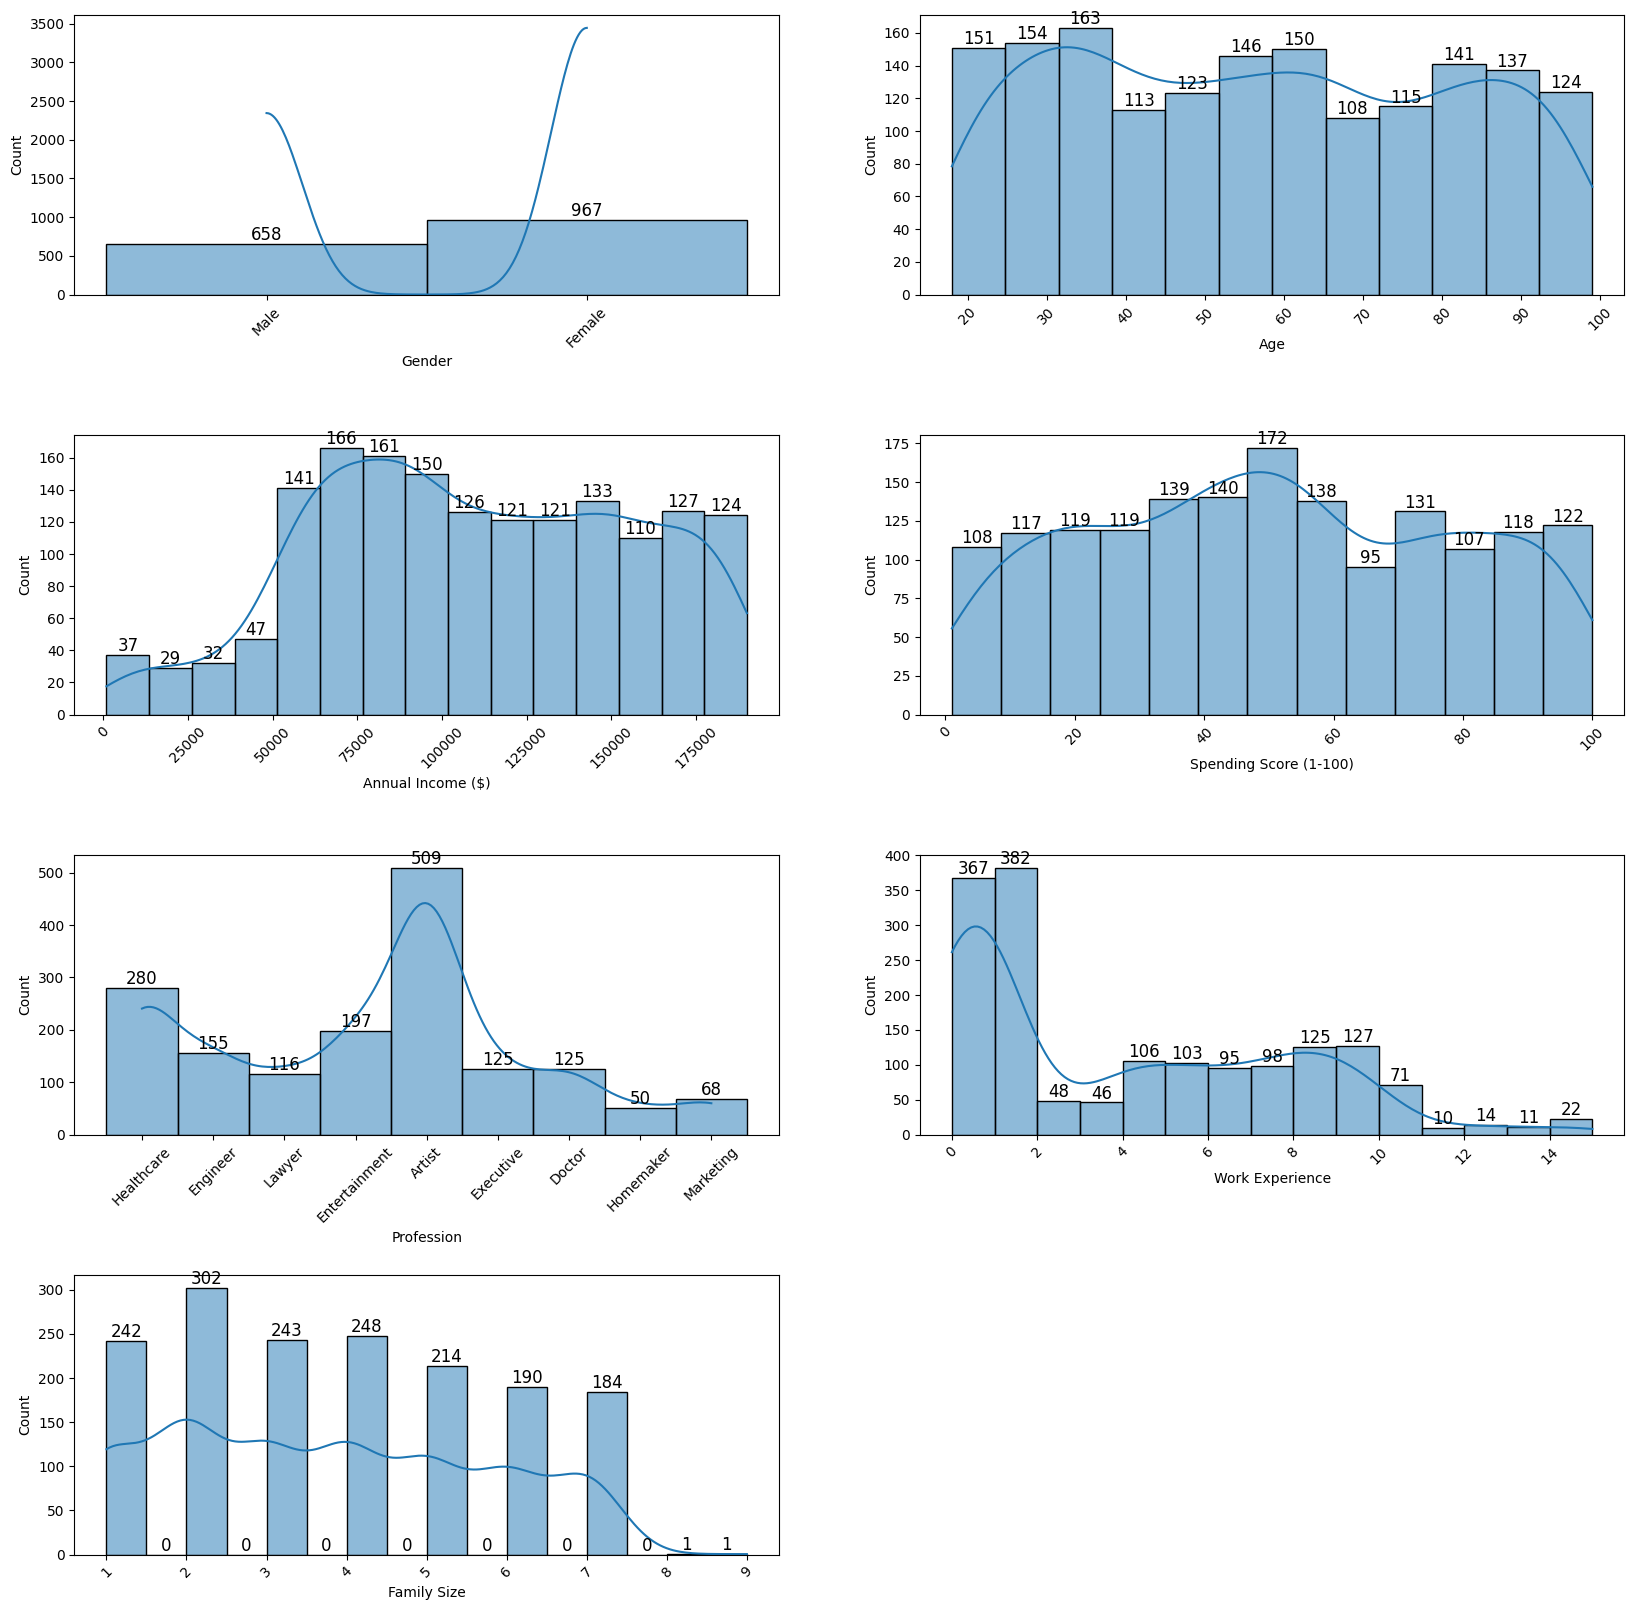

In [56]:
plt.figure(figsize=(20, 20))

for index, column in enumerate(column_names.all_columns):
    plt.subplot(4, 2, index + 1)
    ax = sns.histplot(df2[column], kde=True)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
                int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')
    plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)
plt.show()

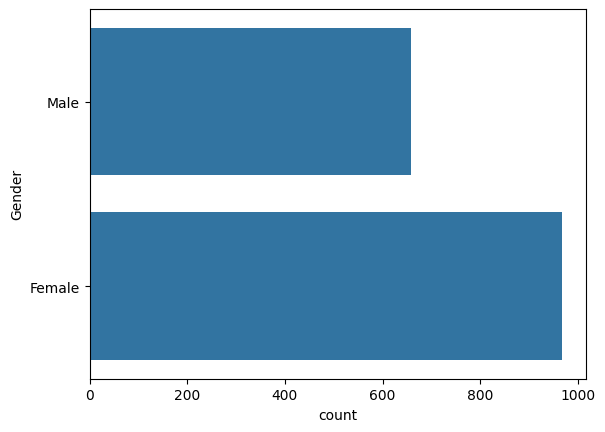

In [34]:
sns.countplot(df2["Gender"])
plt.show()

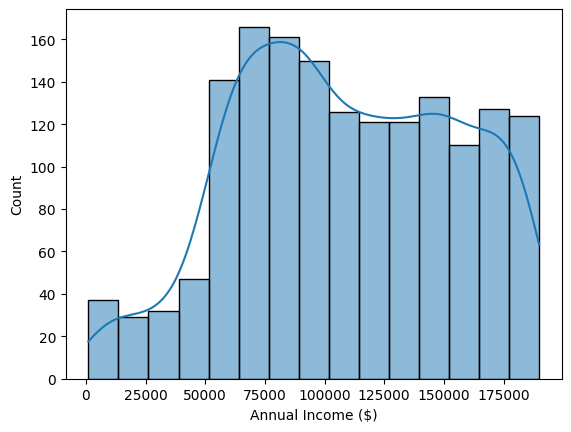

In [35]:
sns.histplot(df2["Annual Income ($)"], kde=True)
plt.show()

Standardization

In [24]:
df2.describe().round(3)

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1625.000,1625.000,1625.000,1625.000,1625.000
mean,57.088,109026.625,50.476,3.941,3.743
std,23.840,46289.084,27.700,3.792,1.953
min,18.000,1000.000,1.000,0.000,1.000
25%,36.000,72594.000,28.000,1.000,2.000
50%,56.000,106669.000,50.000,3.000,4.000
75%,78.000,148520.000,74.000,7.000,5.000
max,99.000,189974.000,100.000,15.000,9.000


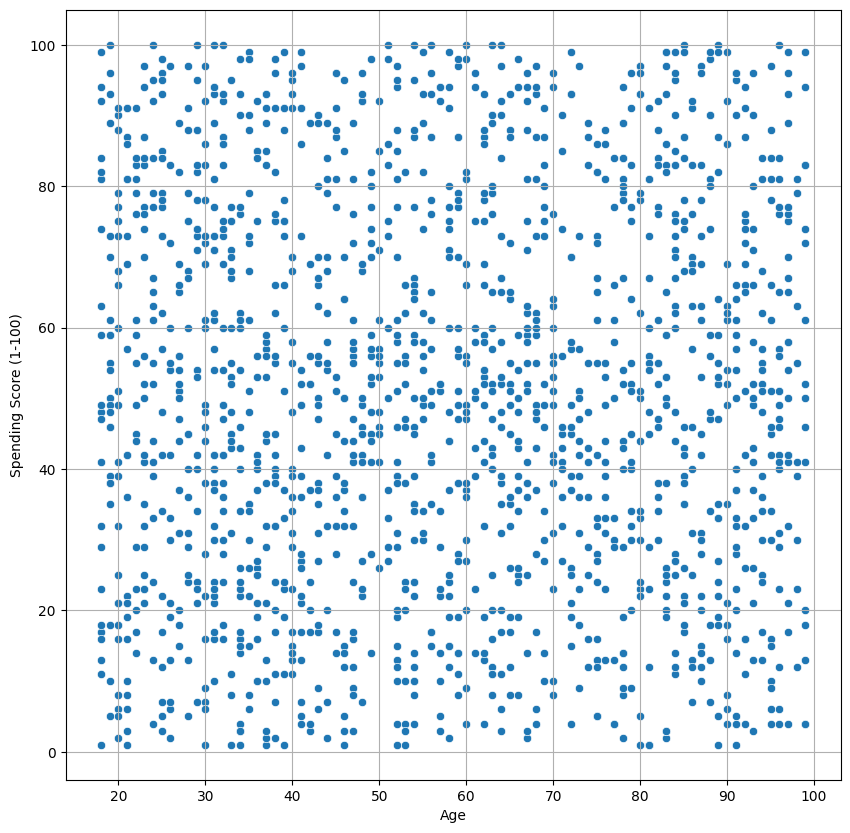

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df2, x='Age', y='Spending Score (1-100)')
plt.grid()
plt.show()

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1625 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1625 non-null   object
 1   Age                     1625 non-null   int64 
 2   Annual Income ($)       1625 non-null   int64 
 3   Spending Score (1-100)  1625 non-null   int64 
 4   Profession              1625 non-null   object
 5   Work Experience         1625 non-null   int64 
 6   Family Size             1625 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 101.6+ KB


In [27]:
scaleStandard = StandardScaler()
df2[column_names.numerical_columns] = scaleStandard.fit_transform(df2[column_names.numerical_columns])

In [28]:
df2.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


In [29]:
df2.describe().round(3)

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1625.000,1625.000,1625.000,1625.000,1625.000
mean,-0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.640,-2.334,-1.787,-1.040,-1.405
25%,-0.885,-0.787,-0.812,-0.776,-0.893
50%,-0.046,-0.051,-0.017,-0.248,0.132
75%,0.877,0.853,0.850,0.807,0.644
max,1.759,1.749,1.788,2.918,2.693


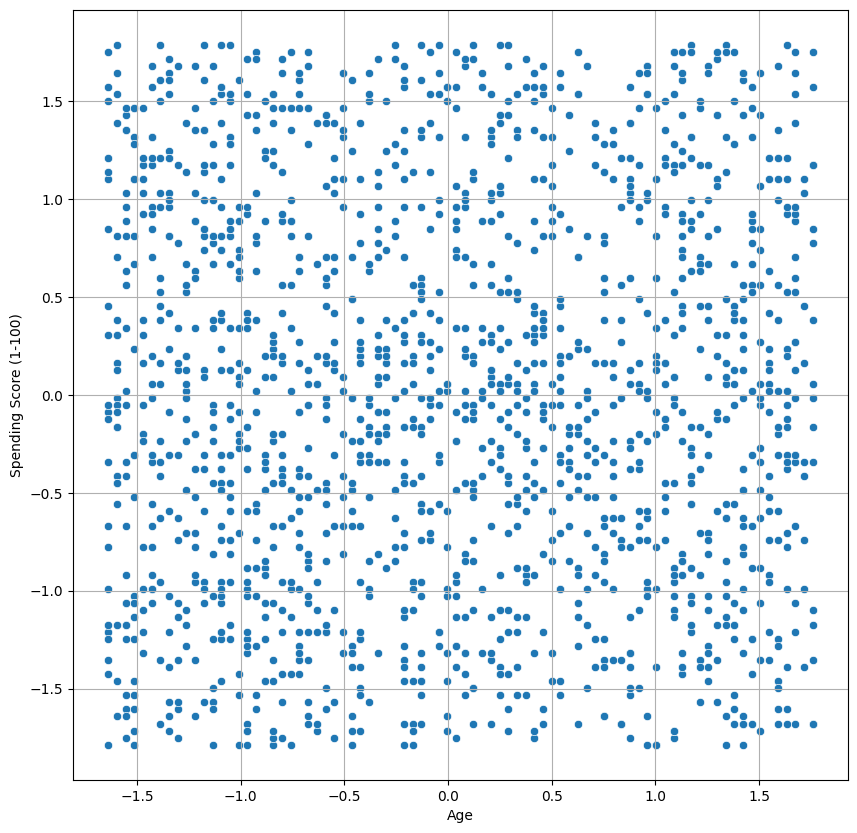

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df2, x='Age', y='Spending Score (1-100)')
plt.grid()
plt.show()

correlation

In [31]:
df2.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


<Axes: >

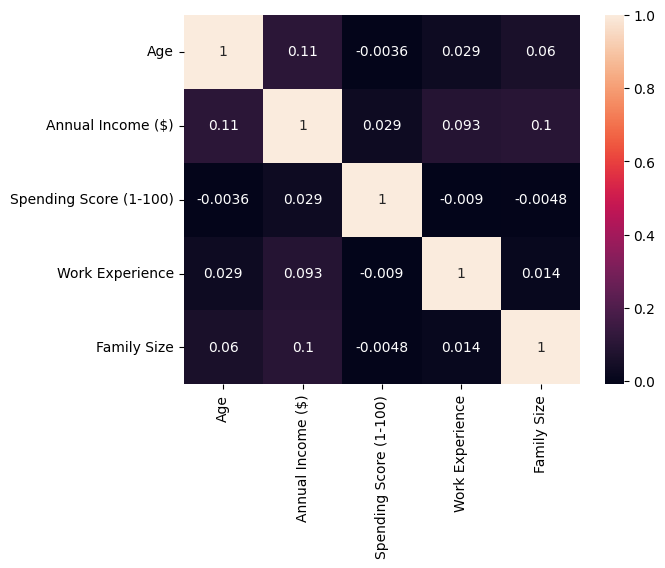

In [32]:
sns.heatmap(df2[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']].corr(), annot=True)

In [33]:
for column in column_names.categorical_columns:
    print(df2[column].value_counts())
    print("\n")

Gender
Female    967
Male      658
Name: count, dtype: int64


Profession
Artist           509
Healthcare       280
Entertainment    197
Engineer         155
Executive        125
Doctor           125
Lawyer           116
Marketing         68
Homemaker         50
Name: count, dtype: int64




In [34]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df2[["Gender", "Profession"]])
encoded_data

<1625x11 sparse matrix of type '<class 'numpy.float64'>'
	with 3250 stored elements in Compressed Sparse Row format>

In [35]:
encoded_columns = encoder.get_feature_names_out(["Gender", "Profession"])
encoded_columns

array(['Gender_Female', 'Gender_Male', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'], dtype=object)

In [36]:
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)
df_encoded.head()

,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df2.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300


In [38]:
df_combined = pd.concat([df2, df_encoded], axis=1)
df_combined.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,Male,-1.598145,-2.031917,-0.414413,Healthcare,-0.775892,0.131770,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Male,-1.514227,-1.599717,1.102301,Engineer,-0.248240,-0.380494,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Female,-1.556186,-0.497606,-1.606117,Engineer,-0.775892,-1.405024,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Female,-1.430308,-1.081076,0.957852,Lawyer,-1.039717,-0.892759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,-1.094634,-1.534886,-0.378301,Entertainment,-0.512066,1.156300,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df3 = df_combined.drop(["Gender", "Profession"], axis=1)
df3.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.598145,-2.031917,-0.414413,-0.775892,0.131770,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.514227,-1.599717,1.102301,-0.248240,-0.380494,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.556186,-0.497606,-1.606117,-0.775892,-1.405024,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.430308,-1.081076,0.957852,-1.039717,-0.892759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.094634,-1.534886,-0.378301,-0.512066,1.156300,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


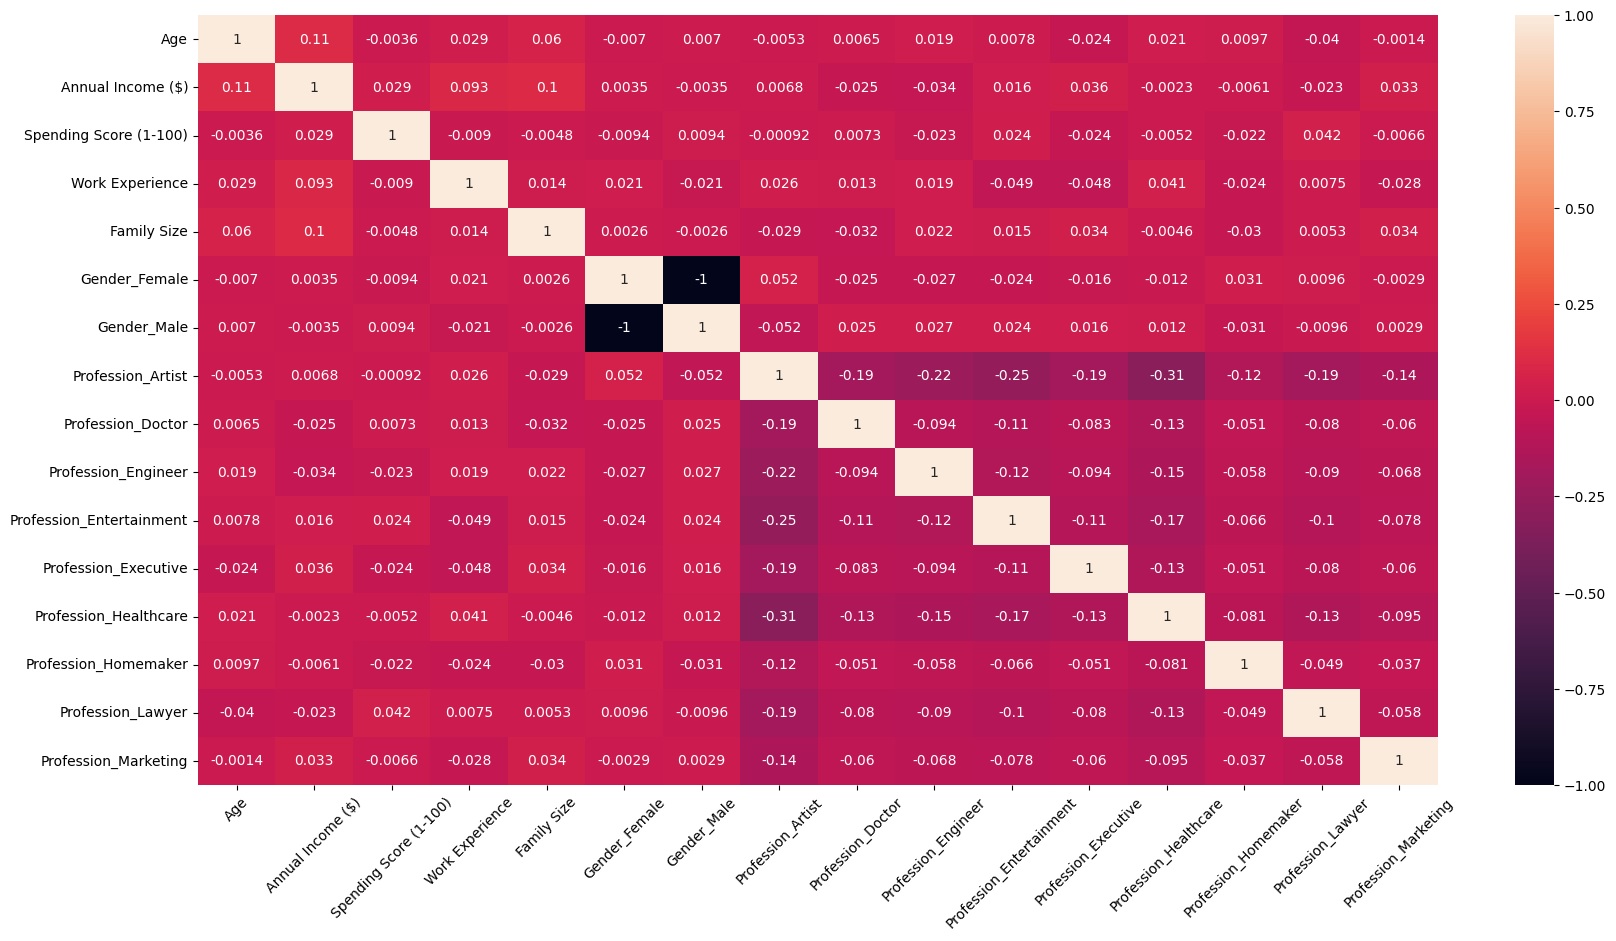

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()